In [1]:
!pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.2/776.2 kB 9.3 MB/s eta 0:00:00


In [2]:
import pyreadr

# Path to your .rda file
rda_path = '/content/drive/MyDrive/refugees-main/data/population.rda'

# Load the R data
result = pyreadr.read_r(rda_path)

# Check what objects are inside
print(result.keys())


odict_keys(['population'])


In [3]:
# Extract main dataframe
df = result['population']

# Preview the first 5 rows
df.head()


,year,coo_name,coo,coo_iso,coa_name,coa,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,oip,hst
0,1951.0,Unknown,UKN,UNK,Australia,AUL,AUS,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,1951.0,Unknown,UKN,UNK,Austria,AUS,AUT,282000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,1951.0,Unknown,UKN,UNK,Belgium,BEL,BEL,55000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,1951.0,Unknown,UKN,UNK,Canada,CAN,CAN,168511.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,1951.0,Unknown,UKN,UNK,Denmark,DEN,DNK,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [4]:
df.to_csv('/content/drive/MyDrive/refugees-main/data/population_clean.csv', index=False)


In [5]:
import pandas as pd

# Load CSV
df = pd.read_csv('/content/drive/MyDrive/refugees-main/data/population_clean.csv')

# Convert year to int
df['year'] = df['year'].astype(int)

# Drop mostly empty columns
df.drop(columns=['oip'], inplace=True)

# Fill NaNs in numeric columns
numeric_cols = ['refugees','asylum_seekers','returned_refugees','idps','returned_idps','stateless','ooc','hst']
df[numeric_cols] = df[numeric_cols].fillna(0)

df.head()


,year,coo_name,coo,coo_iso,coa_name,coa,coa_iso,refugees,asylum_seekers,returned_refugees,idps,returned_idps,stateless,ooc,hst
0,1951,Unknown,UKN,UNK,Australia,AUL,AUS,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1951,Unknown,UKN,UNK,Austria,AUS,AUT,282000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1951,Unknown,UKN,UNK,Belgium,BEL,BEL,55000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1951,Unknown,UKN,UNK,Canada,CAN,CAN,168511.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1951,Unknown,UKN,UNK,Denmark,DEN,DNK,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Group by year for global trends
global_totals = df.groupby('year')[['refugees','asylum_seekers','idps','stateless','hst','ooc']].sum().reset_index()

# Save summary CSV for dashboard/portfolio
global_totals.to_csv('/content/drive/MyDrive/refugees-main/data/global_totals.csv', index=False)
global_totals.head()


,year,refugees,asylum_seekers,idps,stateless,hst,ooc
0,1951,2116011.0,0.0,0.0,0.0,0.0,0.0
1,1952,1952928.0,0.0,0.0,0.0,0.0,0.0
2,1953,1847304.0,0.0,0.0,0.0,0.0,0.0
3,1954,1749628.0,0.0,0.0,0.0,0.0,0.0
4,1955,1717966.0,0.0,0.0,0.0,0.0,0.0


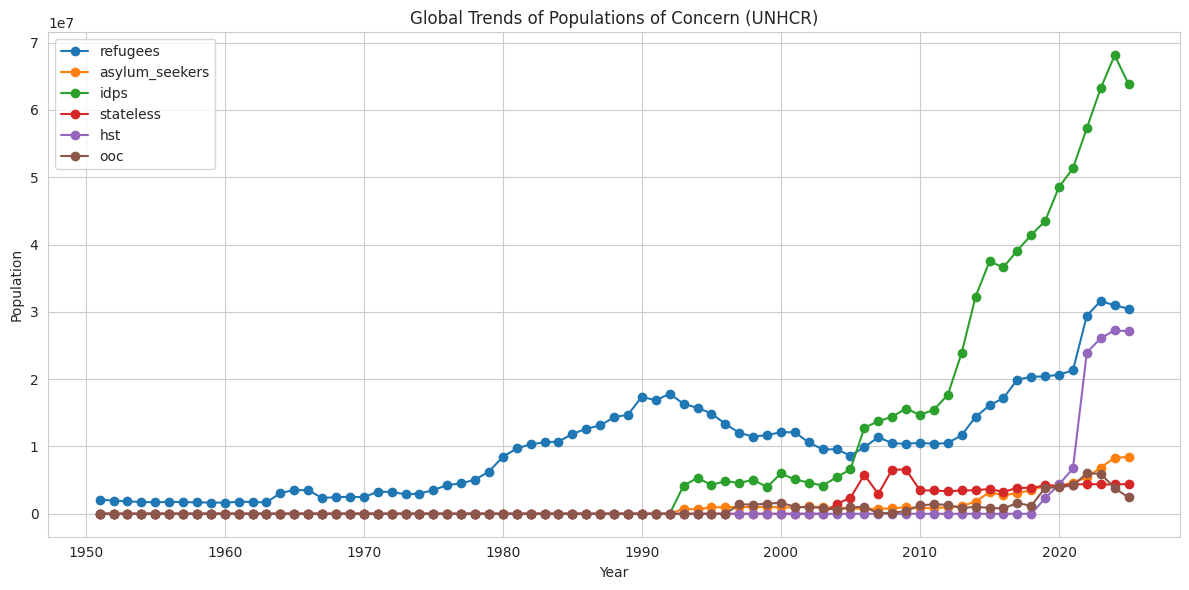

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Line plot for global trends
plt.figure(figsize=(12,6))
for col in ['refugees','asylum_seekers','idps','stateless','hst','ooc']:
    plt.plot(global_totals['year'], global_totals[col], marker='o', label=col)
plt.title('Global Trends of Populations of Concern (UNHCR)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/refugees-main/data/global_trends.png', dpi=300)
plt.show()


In [8]:
# Year-over-Year growth for refugees
global_totals['refugees_yoy'] = global_totals['refugees'].pct_change() * 100
global_totals[['year','refugees','refugees_yoy']]


,year,refugees,refugees_yoy
0,1951,2116011.0,NaN
1,1952,1952928.0,-7.707096
2,1953,1847304.0,-5.408494
3,1954,1749628.0,-5.287489
4,1955,1717966.0,-1.809642
...,...,...,...
70,2021,21327285.0,3.220617
71,2022,29429078.0,37.987925
72,2023,31637408.0,7.503905
73,2024,30958200.0,-2.146851


In [9]:
# Filter data for 2023 and get top 5 countries by refugees
top5 = df[df['year'] == 2023].sort_values('refugees', ascending=False).head(5)


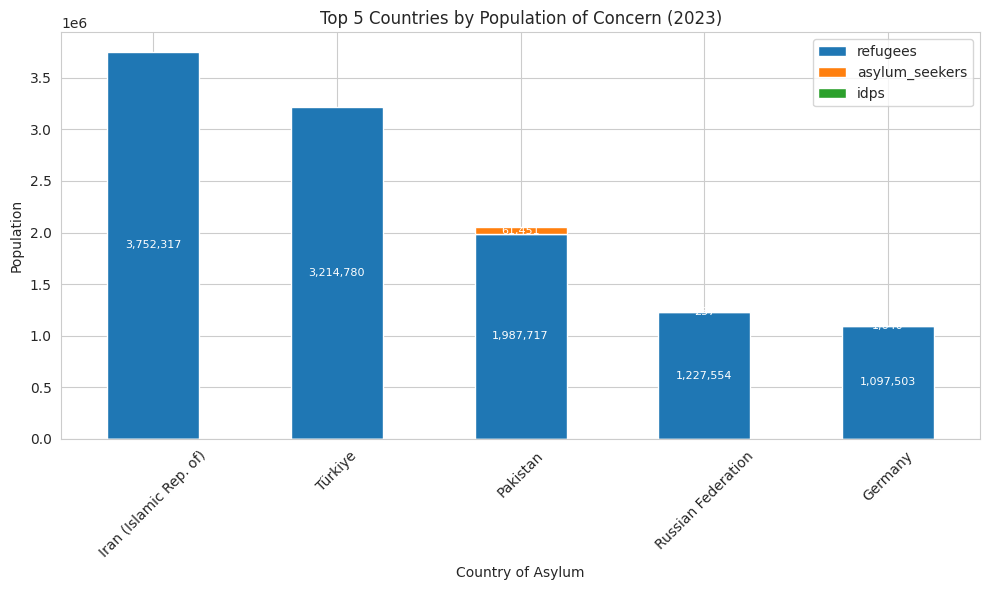

In [10]:
# Set index to country of asylum
top5_chart = top5.set_index('coa_name')[['refugees','asylum_seekers','idps']]

# Set style
sns.set_style("whitegrid")

# Plot stacked bar chart
ax = top5_chart.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#1f77b4','#ff7f0e','#2ca02c']
)

# Add labels and title
ax.set_ylabel('Population')
ax.set_xlabel('Country of Asylum')
ax.set_title('Top 5 Countries by Population of Concern (2023)')
plt.xticks(rotation=45)

# Annotate each segment with population values
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height):,}',
                    (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
                    ha='center', va='center', fontsize=8, color='white', rotation=0)

plt.tight_layout()


In [11]:
plt.savefig('/content/drive/MyDrive/refugees-main/data/top5_2023.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>